In [1]:
import joblib
import shap
import pandas as pd
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
xgboost = joblib.load("models-1/xgboost.joblib")
X_train = joblib.load("models-1/X_train.joblib")

In [7]:
X_train.head(2)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,HOUR_APPR_PROCESS_START,EMERGENCYSTATE_MODE,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAY_WEEK_SIN,DAY_WEEK_COS,HOUR_APPR_PROCESS_START_sin,HOUR_APPR_PROCESS_START_cos
0,1,1,1,12,0,0,0,0,0,0,...,-0.07169,-0.062456,-0.158267,1.03274,-0.161781,0.015589,0.781831,0.623490,1.224647e-16,-1.000000
1,1,0,0,13,0,0,0,0,0,0,...,-0.07169,-0.062456,-0.158267,1.03274,-0.161781,1.143483,-0.974928,-0.222521,-2.588190e-01,-0.965926


## Create TreeExplainer and get shap values

In [39]:
explainer = shap.TreeExplainer(xgboost, data=X_train)
shap_values = explainer.shap_values(X_train)

100%|===================| 39525/39720 [01:16<00:00]        

In [40]:
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,HOUR_APPR_PROCESS_START,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAY_WEEK_SIN,DAY_WEEK_COS,HOUR_APPR_PROCESS_START_sin,HOUR_APPR_PROCESS_START_cos
0,-0.061007,0.048772,-0.001986,0.0,0.005514,-0.033335,0.0,0.006354,0.000165,-0.006899,...,0.0,0.0,0.000000,0.000254,0.001730,-0.006216,0.003565,0.010033,-0.001385,-0.002264
1,-0.133787,0.042375,0.000459,0.0,0.001583,0.091185,0.0,0.006724,0.000000,0.001819,...,0.0,0.0,0.000000,0.000414,-0.046166,0.032549,0.028598,0.008911,0.010069,0.008701
2,-0.120439,0.039735,0.000576,0.0,-0.020029,-0.016055,0.0,0.004187,0.000000,0.001520,...,0.0,0.0,0.000000,0.000000,0.013398,0.025865,-0.005301,-0.027491,-0.000372,-0.000919
3,-0.094710,0.046511,0.000459,0.0,0.002081,-0.021168,0.0,0.002968,0.000000,0.002772,...,0.0,0.0,-0.000553,0.000000,0.007789,0.067475,-0.004701,-0.017336,0.014048,-0.002726
4,-0.082337,0.045210,0.000459,0.0,-0.013578,-0.019176,0.0,0.009572,0.000000,0.003449,...,0.0,0.0,0.000000,0.000000,-0.053271,-0.040731,0.018177,0.003159,0.009328,-0.001193


## The top 30 features of high importance

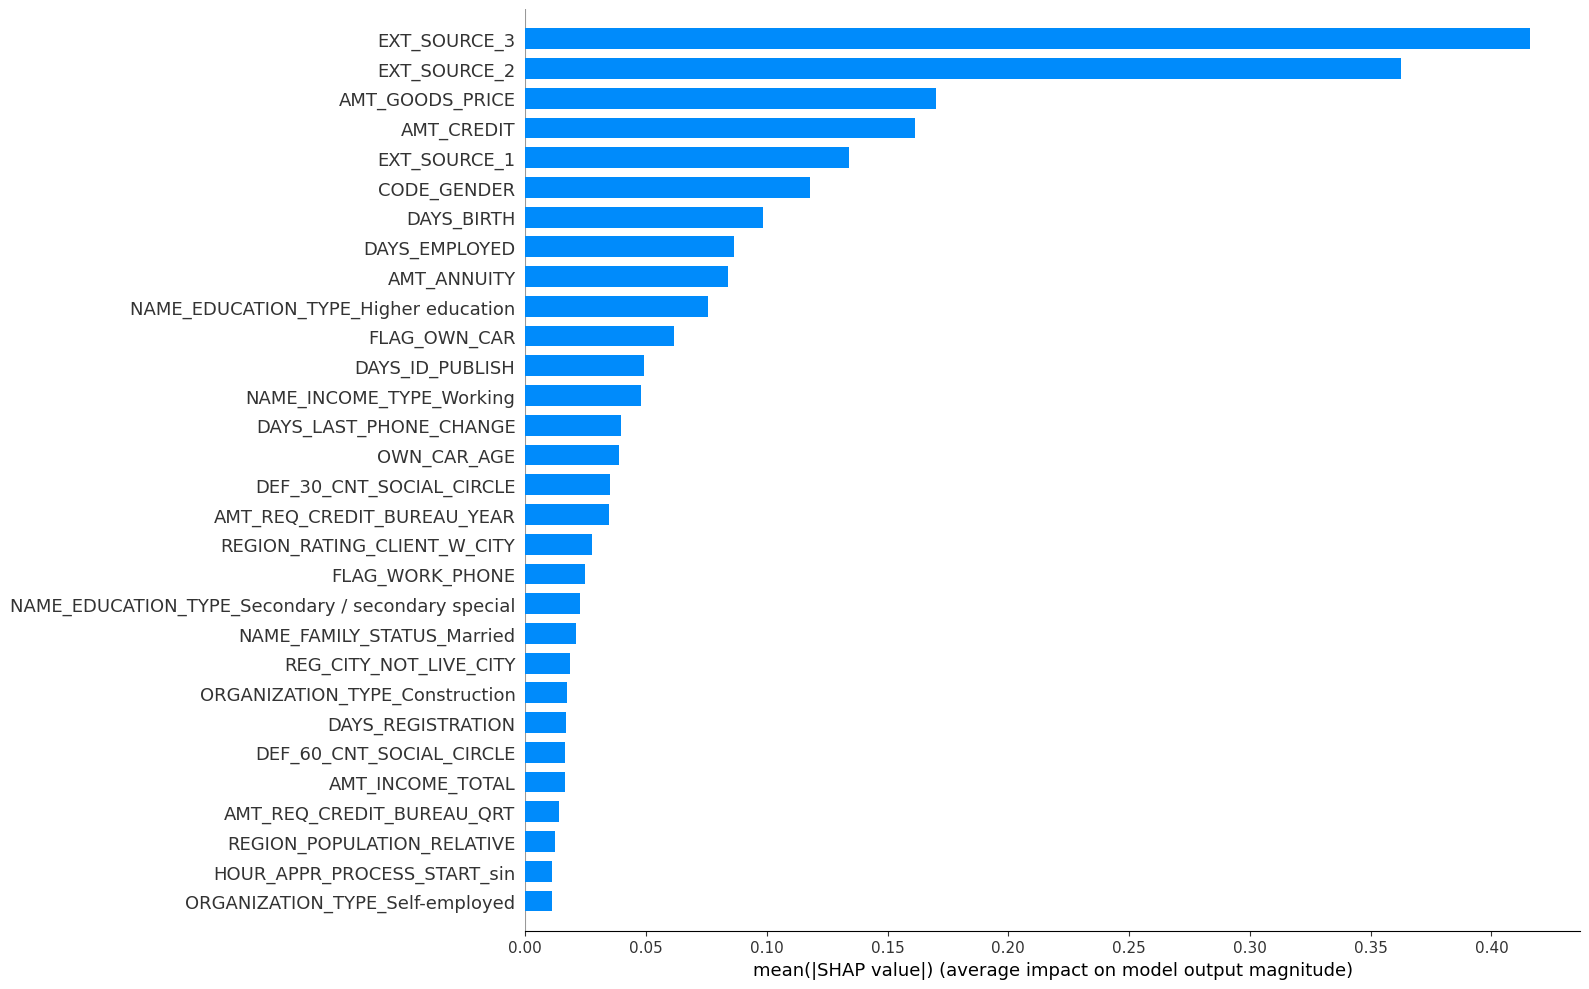

In [78]:
shap.summary_plot(shap_values, X_train, plot_type='bar', plot_size=[16,10], max_display=30)

## Top 30 features - to find whether higher value of feature x corresponds to class 0/1

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


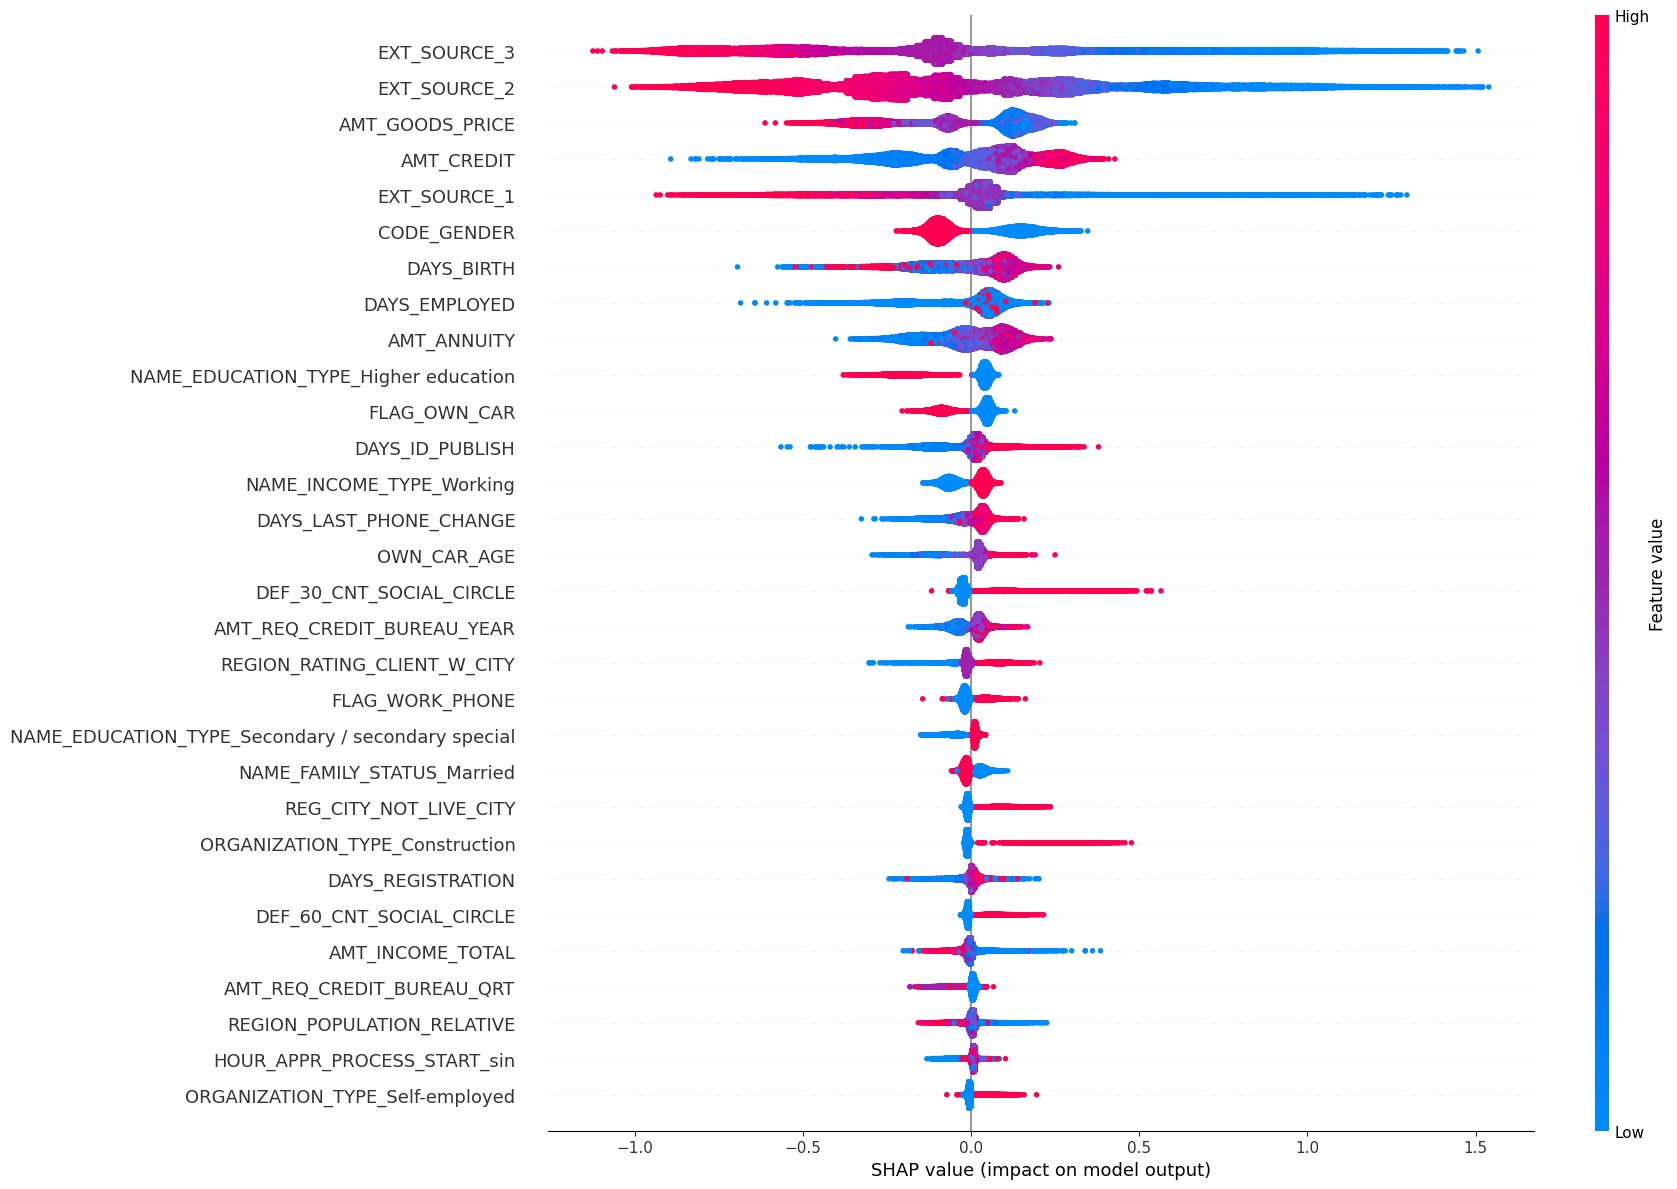

In [48]:
shap.summary_plot(shap_values, X_train, plot_size=[18,12], max_display=30)

Small analysis on the graph

Features which affect for class 0 (non-defaulter):
- Higher value of EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1
- ? Higher value of AMT_GOODS_PRICE -> principal amount borrowed
- ? lower value of AMT_CREDIT -> maximum amount upto $xxx which can be borrowed
- ? higher value of CODE_GENDER -> Female 
- ? lower value of DAYS_EMPLOYED
- lower value of AMT_ANNUITY -> the amount whihc borrower repays with interest in regular fixed installments over a specified period of time
- higher value of Higher_education
- higher value of FLAG_OWN_CAR
- lower value of OWN_CAR_AGE 



## Create DF to get the feature, importance score and Direction on class 0/1

In [8]:
feature_names = list(X_train.columns) 

importance_scores = abs(shap_values).mean(axis=0)

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance_scores})

feature_importance_df["Direction"] = feature_importance_df.apply(lambda row: "Higher values lead to class 1 (Defaulters)"
                                                                if shap_values[0][row.name] > 0
                                                                else "Higher values lead to class 0 (Non-Defaulters)"
                                                                if shap_values[0][row.name] < 0
                                                                else "No impact on scores", axis=1)

sorted_feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

sorted_feature_importance_df.head(5)

,Feature,Importance,Direction
139,EXT_SOURCE_3,0.415854,Higher values lead to class 1 (Defaulters)
138,EXT_SOURCE_2,0.362635,Higher values lead to class 1 (Defaulters)
127,AMT_GOODS_PRICE,0.170105,Higher values lead to class 1 (Defaulters)
125,AMT_CREDIT,0.161509,Higher values lead to class 0 (Non-Defaulters)
137,EXT_SOURCE_1,0.134111,Higher values lead to class 1 (Defaulters)


In [84]:
import joblib
features_set = joblib.load("../../test/credit_streamlit/credit-features.joblib")

FEATURES = []
for f_set in features_set.values():
    FEATURES.extend(f_set)

In [ ]:
shap_xgboost = pd.DataFrame(columns=["feature_type","feature","feature_category_if_exists","importance_score","class"])

for idx, row in sorted_feature_importance_df.iterrows():
    if row.Feature in FEATURES:
        type = "num"
    else:
        type = "cat"

    if type == "cat":
        f = "_".join(row.Feature.split("_")[:-1])
        cat_type = row.Feature.split("_")[-1]
    else:
        f = row.Feature
        cat_type = None

    new_row = {
        "feature_type": type,
        "feature": f,
        "feature_category_if_exists": cat_type,
        "importance_score": row.Importance
    }
    shap_xgboost = shap_xgboost.append(new_row, ignore_index=True)

In [35]:
#shap_xgboost.to_csv("shap_xgboost.csv", index=False)

In [46]:
# col_desc = pd.read_csv("../../data/HomeCredit_columns_description.csv", encoding = "ISO-8859-1")
# col_desc = col_desc[col_desc["Table"]=="application_{train|test}.csv"]
# cd = pd.Series(data=col_desc["Description"].values, index=col_desc["Row"])